# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Data Collection

### Data used: PIMA Diabetes Dataset

In [226]:
# loading the diabetes dataset to pandas dataframe
diabetes_dataset=pd.read_csv('diabetes.csv')

In [227]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [228]:
# number of rows and columns in the dataset
diabetes_dataset.shape

(768, 9)

In [229]:
# getting information about dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [230]:
# getting the statistical measure of data
diabetes_dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [231]:
#value count of each class
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 -> Non-Diabetic

1 -> Diabetic

In [232]:
# Checking null values
print (diabetes_dataset.isnull().values.any())

False


In [233]:
# Checking duplicate values
diabetes_dataset.duplicated().sum()

0

In [234]:
# mean of each class
diabetes_dataset.groupby('Outcome').mean()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [235]:
# finding the count of 0 values
a = []
for i in diabetes_dataset.columns:
    a.append(diabetes_dataset[diabetes_dataset[i]==0].shape[0])
pd.Series(a,index=diabetes_dataset.columns)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Problems identified with the dataset are given below

-  Glucose, BloodPressure, SkinThickness, Insulin, BMI columns have **zero** values which is not possible. Maybe null values were replaced with zeros
     - Glucose column has **5** rows with zero values   
     - BloodPressure column has **35** rows with zero values
     - SkinThickness column has **227** rows with zero values
     - Insulin column has **374** rows with zero values
     - BMI column has **11** rows with zero values


# Dealing with Zero Values



In [236]:
# copy original dataset
df = diabetes_dataset.copy()

In [237]:
# importing KNN Imputer
from sklearn.impute import KNNImputer

# Select the columns with zeros
columns_with_zeros = ['Insulin','SkinThickness','BloodPressure']

# Replace zeros with NaN
diabetes_dataset[columns_with_zeros] = diabetes_dataset[columns_with_zeros].replace(0, float('nan'))

# Perform KNN imputation
knn = KNNImputer()
diabetes_dataset_imputed = pd.DataFrame(knn.fit_transform(diabetes_dataset[columns_with_zeros]), columns=columns_with_zeros)

# Update the original DataFrame with the imputed values
diabetes_dataset[columns_with_zeros] = diabetes_dataset_imputed.astype('int64')

In [238]:
diabetes_dataset['Glucose'] = diabetes_dataset['Glucose'].replace(0,int(diabetes_dataset['Glucose'].mean()))
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].replace(0,diabetes_dataset['BMI'].mean())

In [239]:
# comparing values before and after imputation
pd.DataFrame(data = [df.mean(),diabetes_dataset.mean()],index = ['Before Imputation','After Imputation'])

Pregnancies     Glucose  BloodPressure  SkinThickness  \
Before Imputation     3.845052  120.894531      69.105469      20.536458   
After Imputation      3.845052  121.675781      72.365885      29.476562   

                      Insulin        BMI  DiabetesPedigreeFunction        Age  \
Before Imputation   79.799479  31.992578                  0.471876  33.240885   
After Imputation   158.928385  32.450805                  0.471876  33.240885   

                    Outcome  
Before Imputation  0.348958  
After Imputation   0.348958

### Now my dataset is cleaned.

# Exploratory Data Analysis

Text(0.5, 1.0, 'Outcome Distribution')

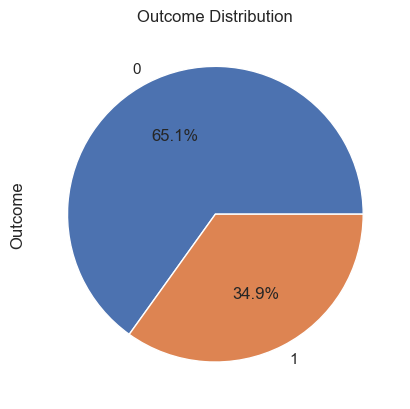

In [240]:
# plotting the pie chart of Outcomes based on the number of dataset entries
diabetes_dataset['Outcome'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.title('Outcome Distribution')

0 -> Non-Diabetic

1 -> Diabetic

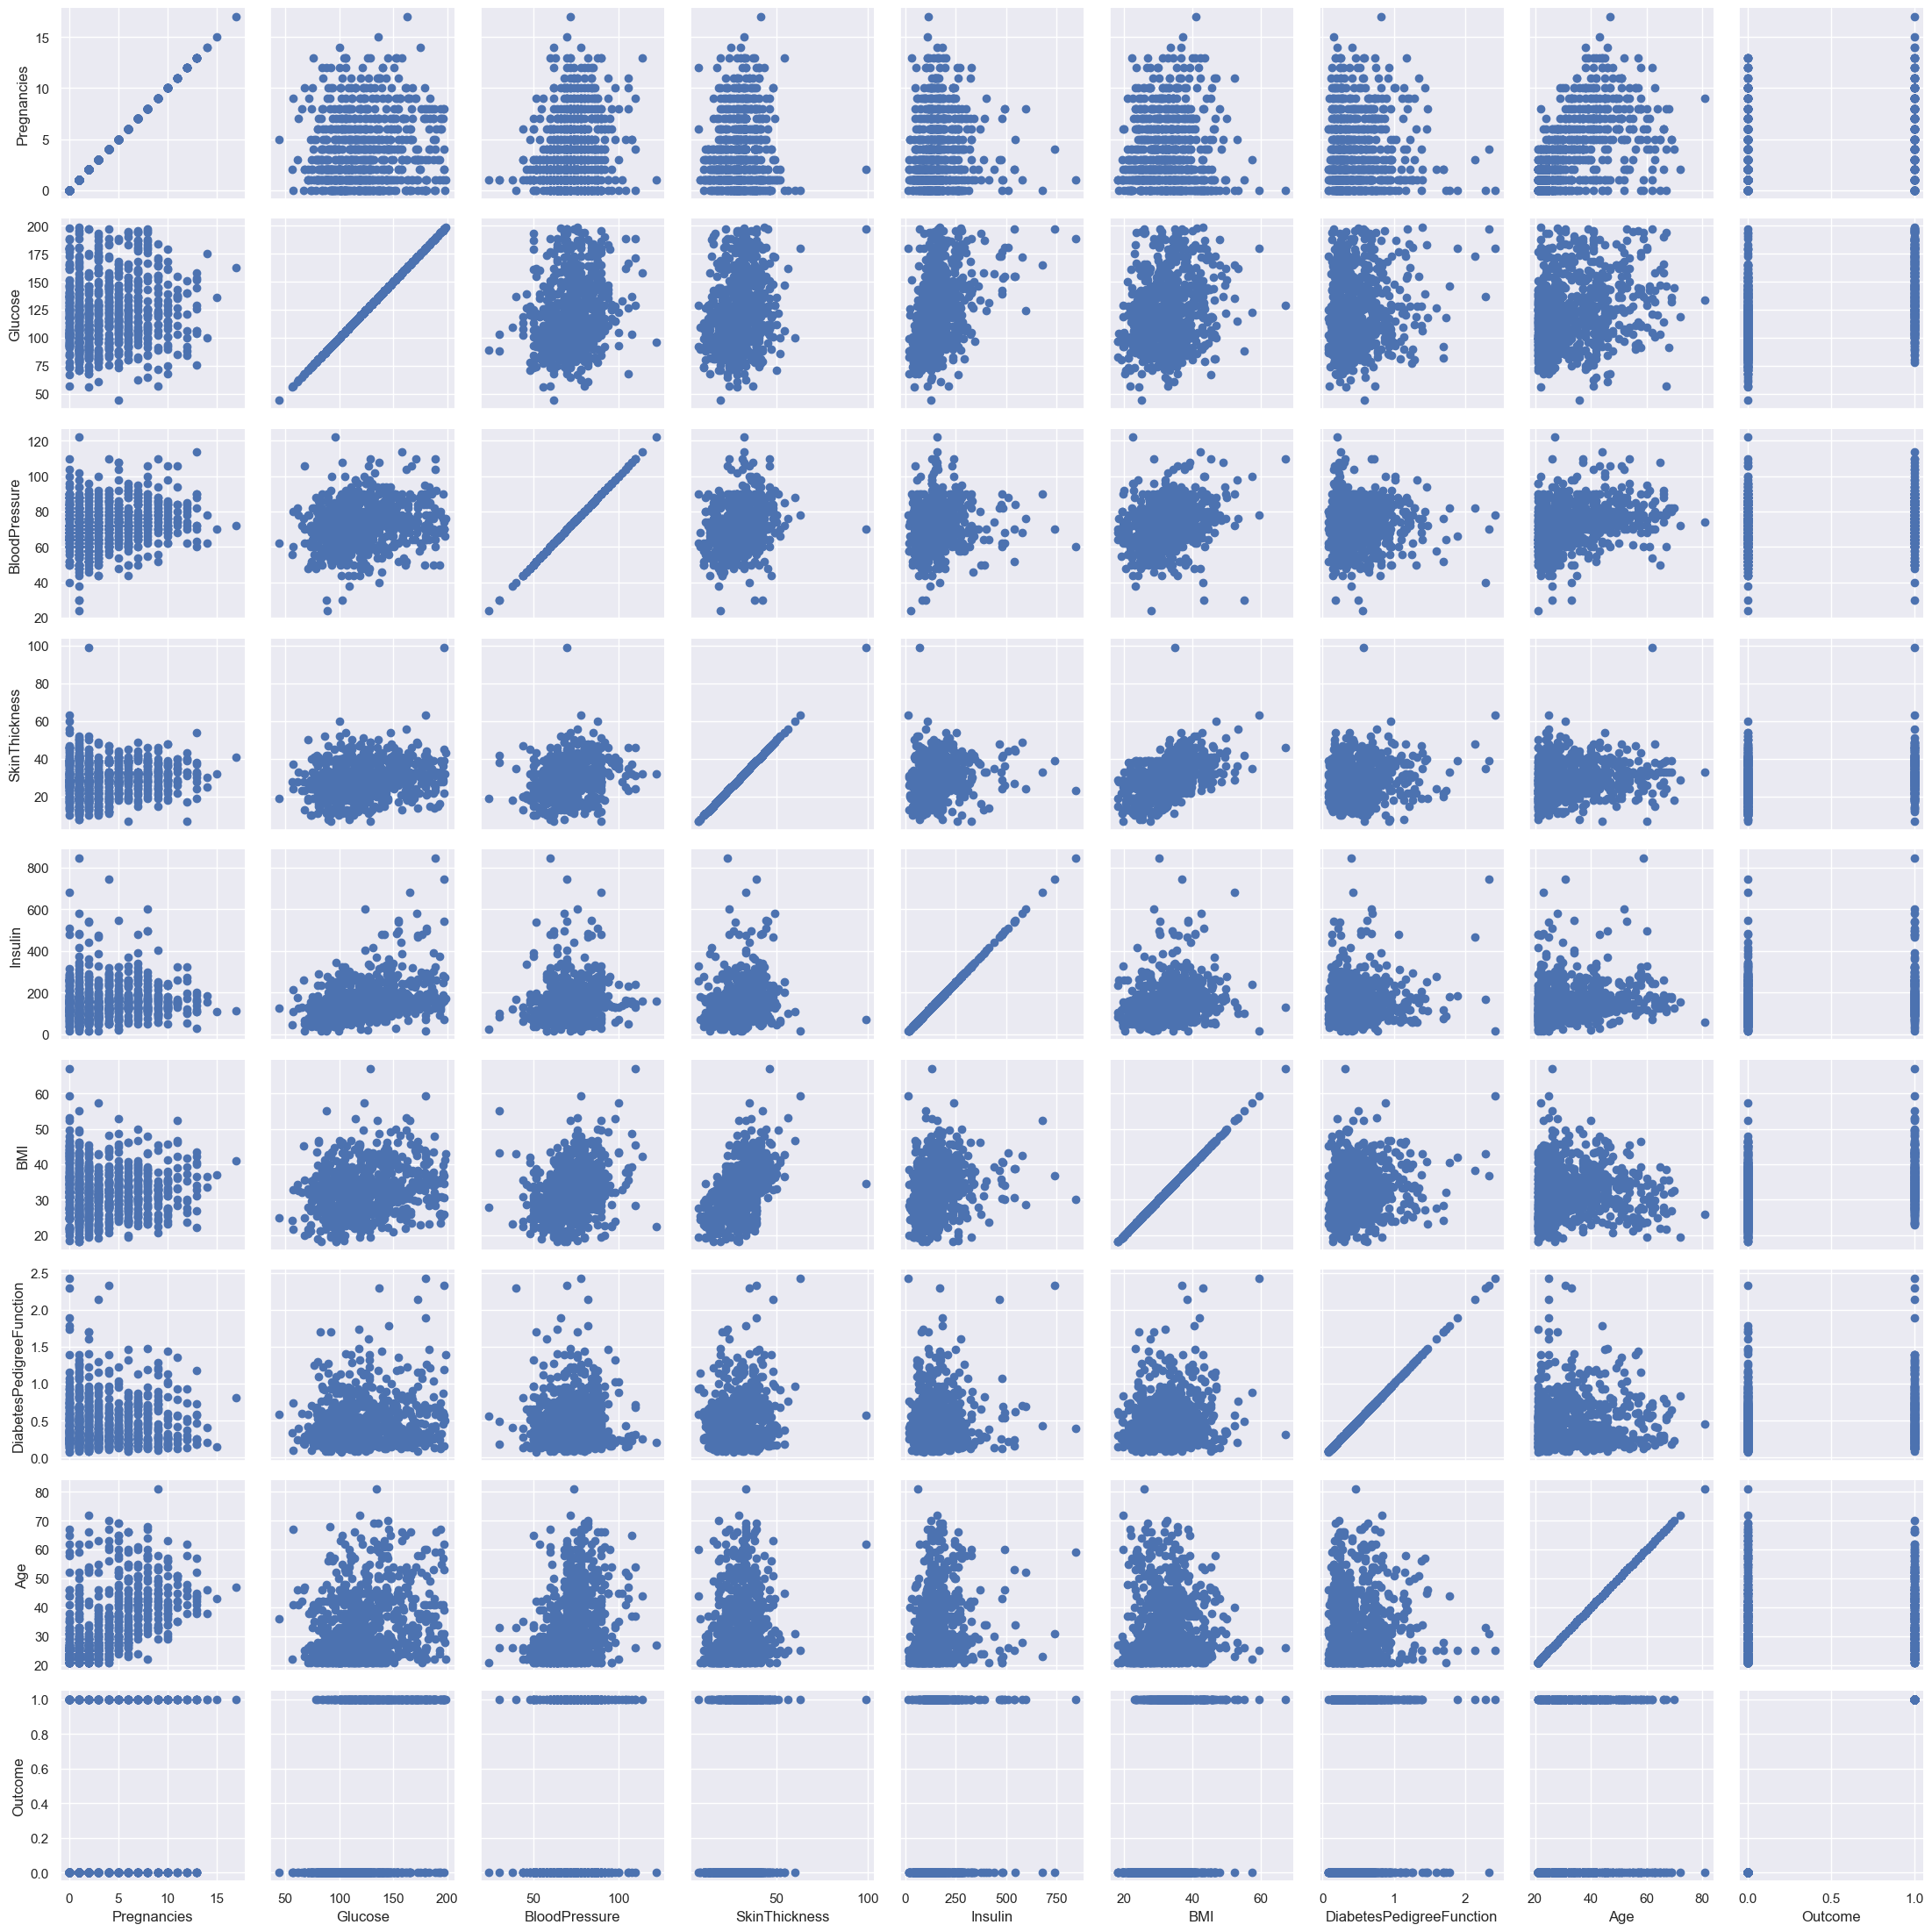

In [241]:
# scatterplot
sns.set(style='darkgrid')
species_col = sns.PairGrid(diabetes_dataset)
species_col.map(plt.scatter)

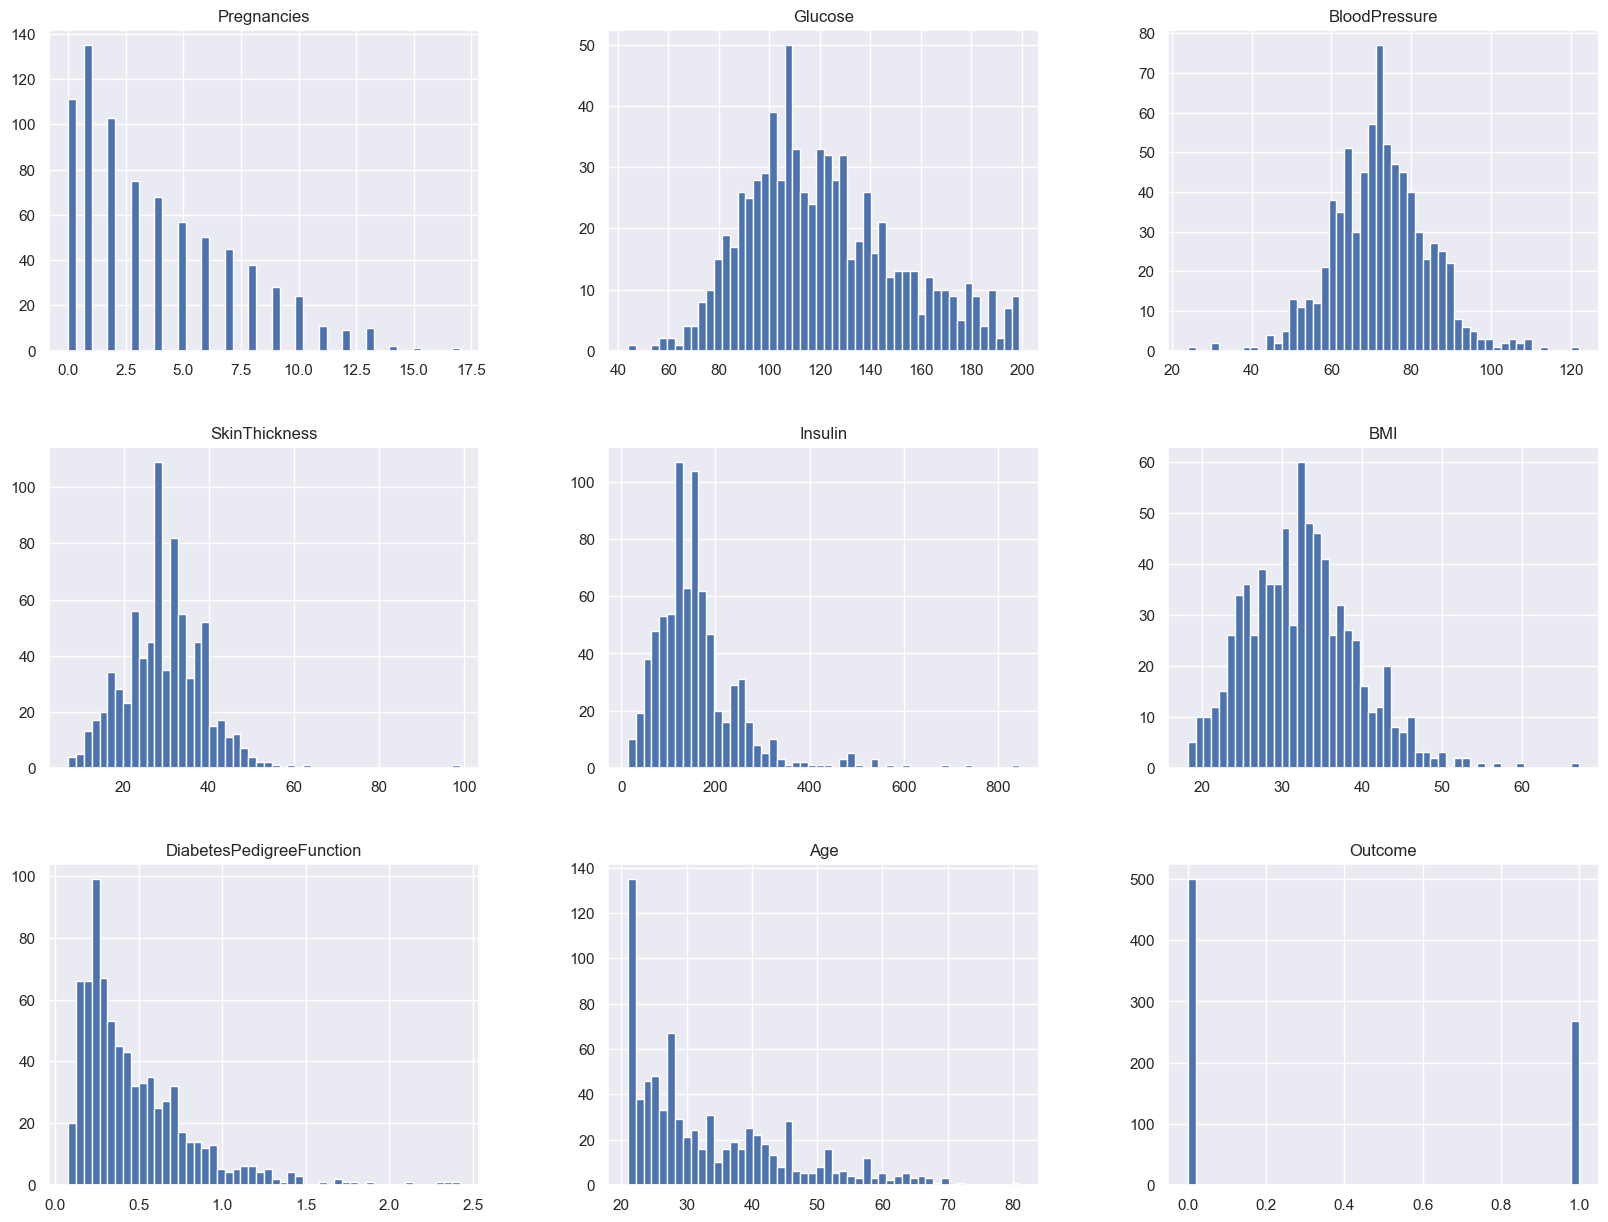

In [242]:
# Histogram for all attributes to analyze the distribution of each attribute
diabetes_dataset.hist(bins=50, figsize=(20, 15))
plt.show()

**Observation:**
* Pregnancies, Insulin, Age and DiabetesPedigreeFunction columns are right skewed
* BloodPressure, Glucose, SkinThickness and BMI columns are normally distributed

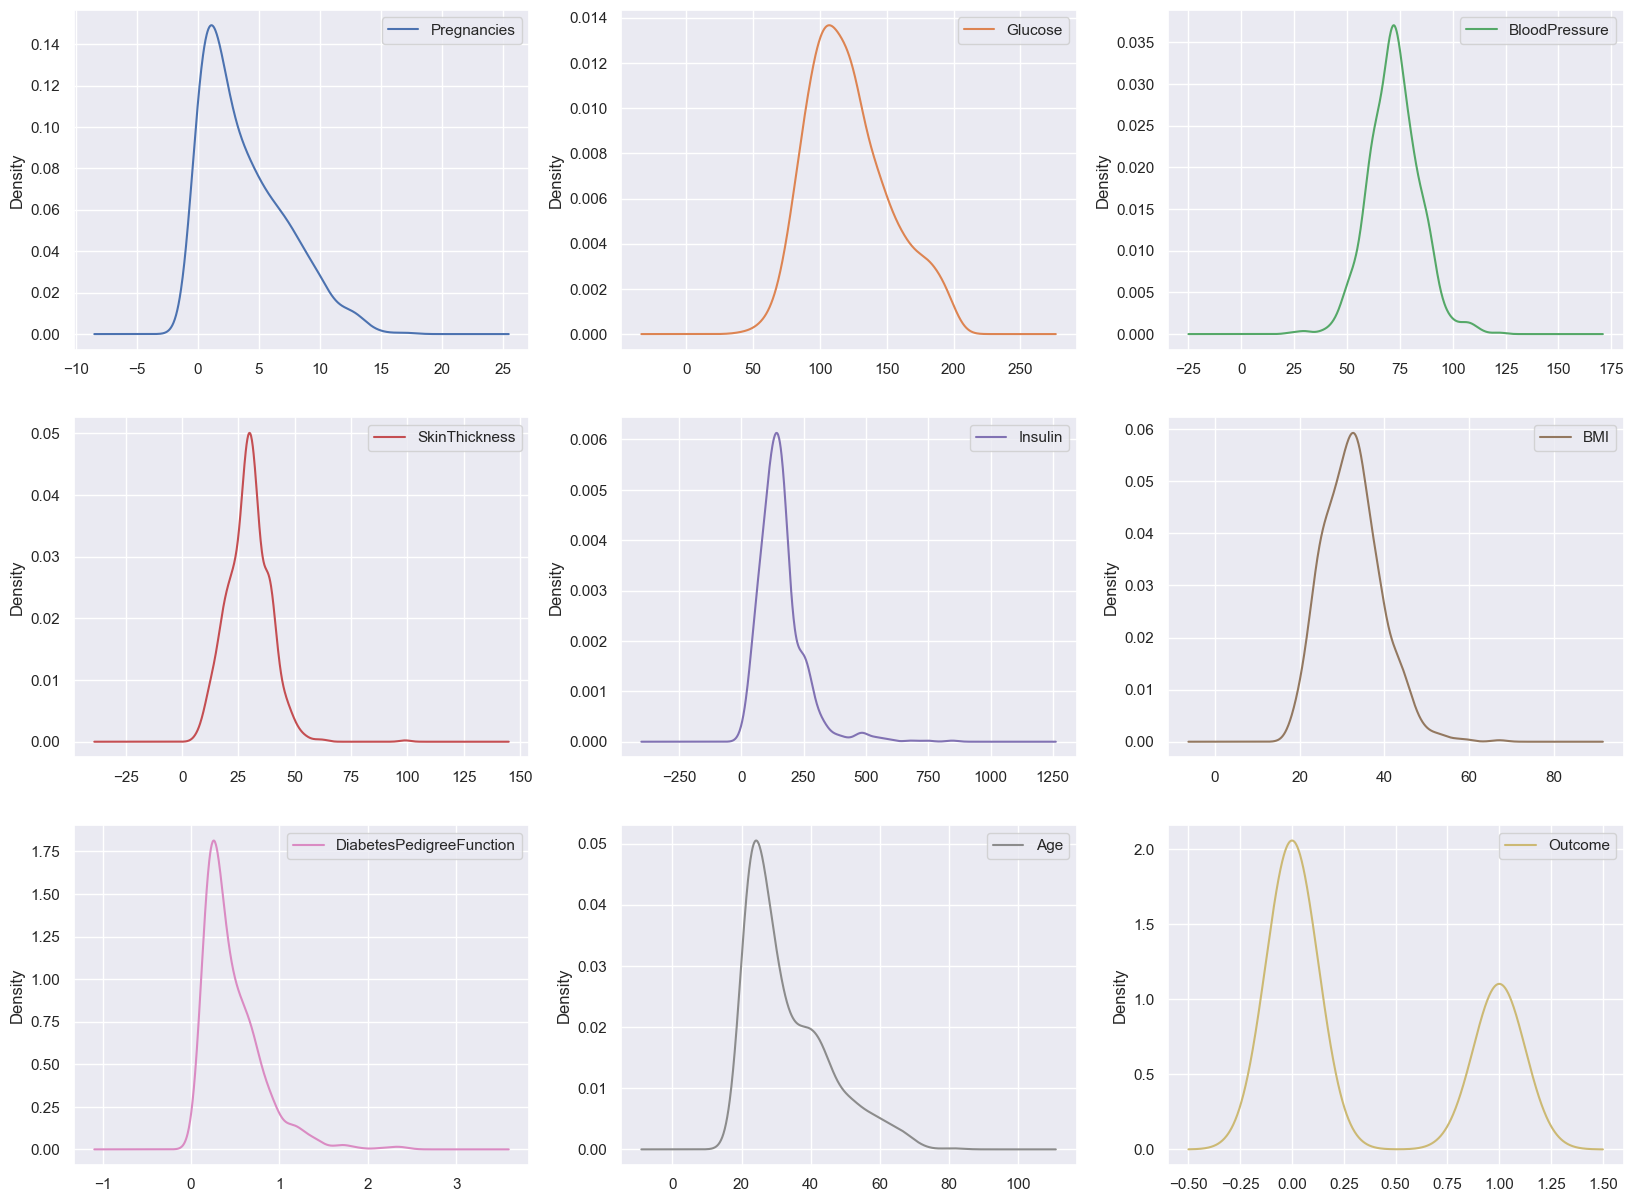

In [243]:
# Density plots for all attributes to visualize the distribution of each attribute
diabetes_dataset.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

Pregnancies                    Axes(0.125,0.653529;0.227941x0.226471)
Glucose                     Axes(0.398529,0.653529;0.227941x0.226471)
BloodPressure               Axes(0.672059,0.653529;0.227941x0.226471)
SkinThickness                  Axes(0.125,0.381765;0.227941x0.226471)
Insulin                     Axes(0.398529,0.381765;0.227941x0.226471)
BMI                         Axes(0.672059,0.381765;0.227941x0.226471)
DiabetesPedigreeFunction           Axes(0.125,0.11;0.227941x0.226471)
Age                             Axes(0.398529,0.11;0.227941x0.226471)
Outcome                         Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

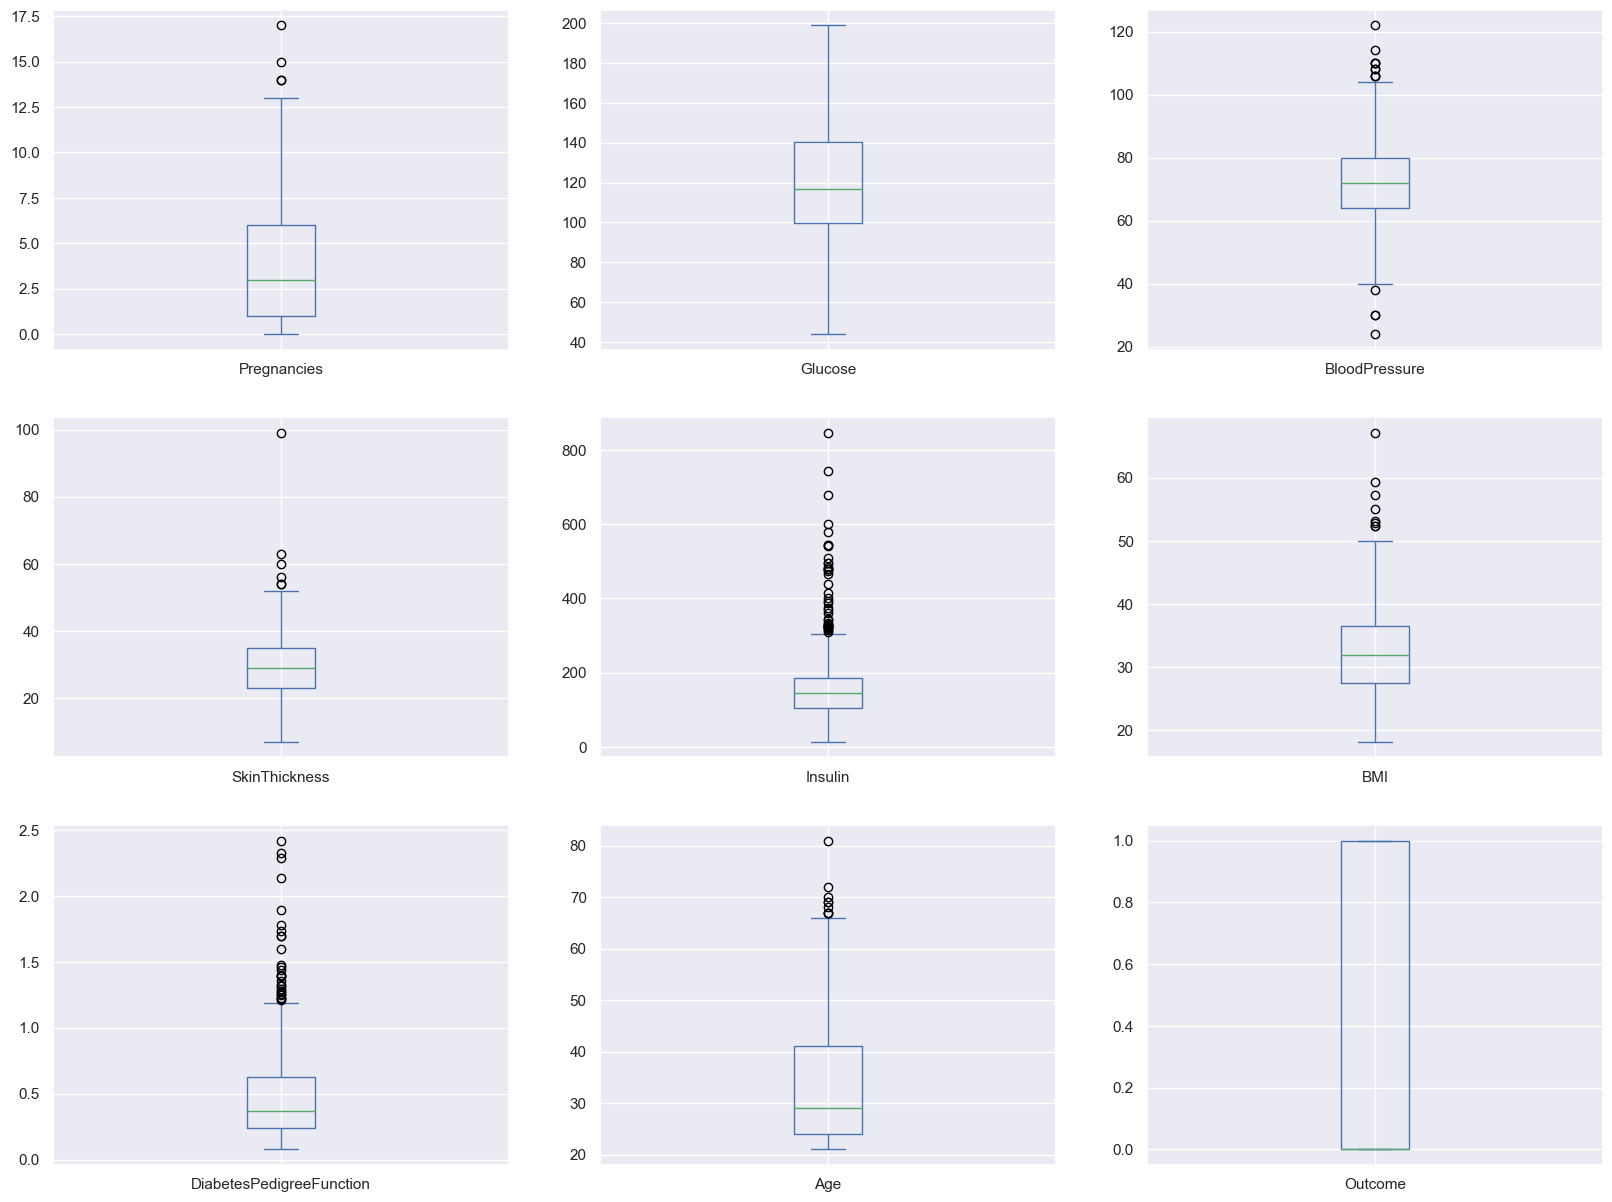

In [244]:
#Box and Whisker plot to visualize the distribution of all atributes
diabetes_dataset.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

### Observation :

* After conducting a thorough visual analysis of the box plots, I observed that, with the exception of the **Glucose** column and the target variable **Outcome**, all other columns in the dataset exhibit the presence of outliers.
* But some of these outliers are valid and reflect genuine extreme values within the data, others appear to be invalid within the context of dataset.
* In particular, I identified and removed the invalid outliers present in the **SkinThickness** and **BloodPressure** columns with the help of trimming. For instance, a SkinThickness value greater than or equal to 60 and a BloodPressure value less than 40 are not possible.


In [245]:
# Trimming
diabetes_dataset = diabetes_dataset[(diabetes_dataset['SkinThickness']<60) & (diabetes_dataset['BloodPressure']>=40)]

# Checking Correlation between each factors


In [246]:
# evaluating correlation coefficient between each factors
corr_analysis = diabetes_dataset.corr()
corr_analysis

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129662       0.200858       0.133195   
Glucose                      0.129662  1.000000       0.213850       0.197311   
BloodPressure                0.200858  0.213850       1.000000       0.287046   
SkinThickness                0.133195  0.197311       0.287046       1.000000   
Insulin                      0.065684  0.419231       0.133246       0.232423   
BMI                          0.034864  0.234322       0.305450       0.539074   
DiabetesPedigreeFunction    -0.023765  0.126734      -0.012927       0.081529   
Age                          0.547281  0.261340       0.327839       0.151462   
Outcome                      0.224899  0.491066       0.168473       0.210864   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.065684  0.034864                 -0.023765   
Glucose                   0.419231  0.234322                  0.126734   
BloodPressure             0.133246  0.305450                 -0.012927   
SkinThickness             0.232423  0.539074                  0.081529   
Insulin                   1.000000  0.223807                  0.086030   
BMI                       0.223807  1.000000                  0.126609   
DiabetesPedigreeFunction  0.086030  0.126609                  1.000000   
Age                       0.161900  0.030354                  0.039755   
Outcome                   0.207157  0.309158                  0.168356   

                               Age   Outcome  
Pregnancies               0.547281  0.224899  
Glucose                   0.261340  0.491066  
BloodPressure             0.327839  0.168473  
SkinThickness             0.151462  0.210864  
Insulin                   0.161900  0.207157  
BMI                       0.030354  0.309158  
DiabetesPedigreeFunction  0.039755  0.168356  
Age                       1.000000  0.237052  
Outcome                   0.237052  1.000000

<Axes: >

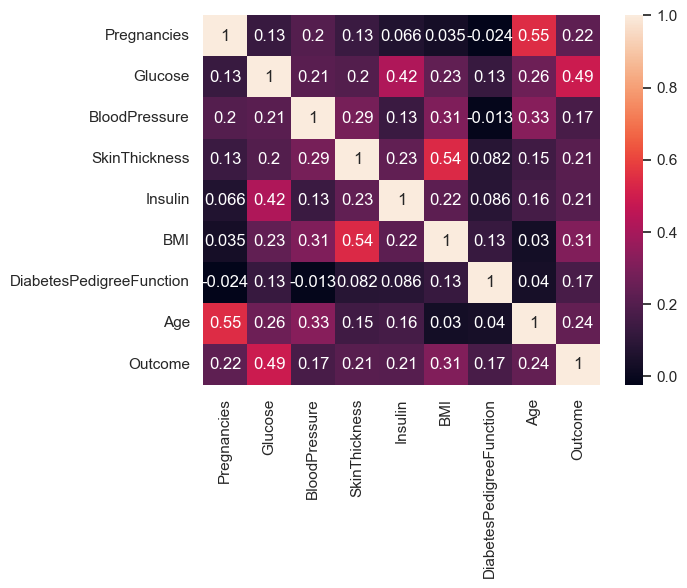

In [247]:
# creating a heatmap
sns.heatmap(corr_analysis, annot = True)

**There are no strong correlation between the features. The strongest ones are the following (as expected):**

* Age x pregnancies (0.55) - Older women tend to have higher number of pregnancies

* Glucose x insulin (0.42)- Women that have higher level of glucose tend to have higher level of insulin

* Skin fold thickness x BMI (0.54) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

* Glucose x outcome (0.49) - Women with higher glucose levels are more likely to have diabetes.



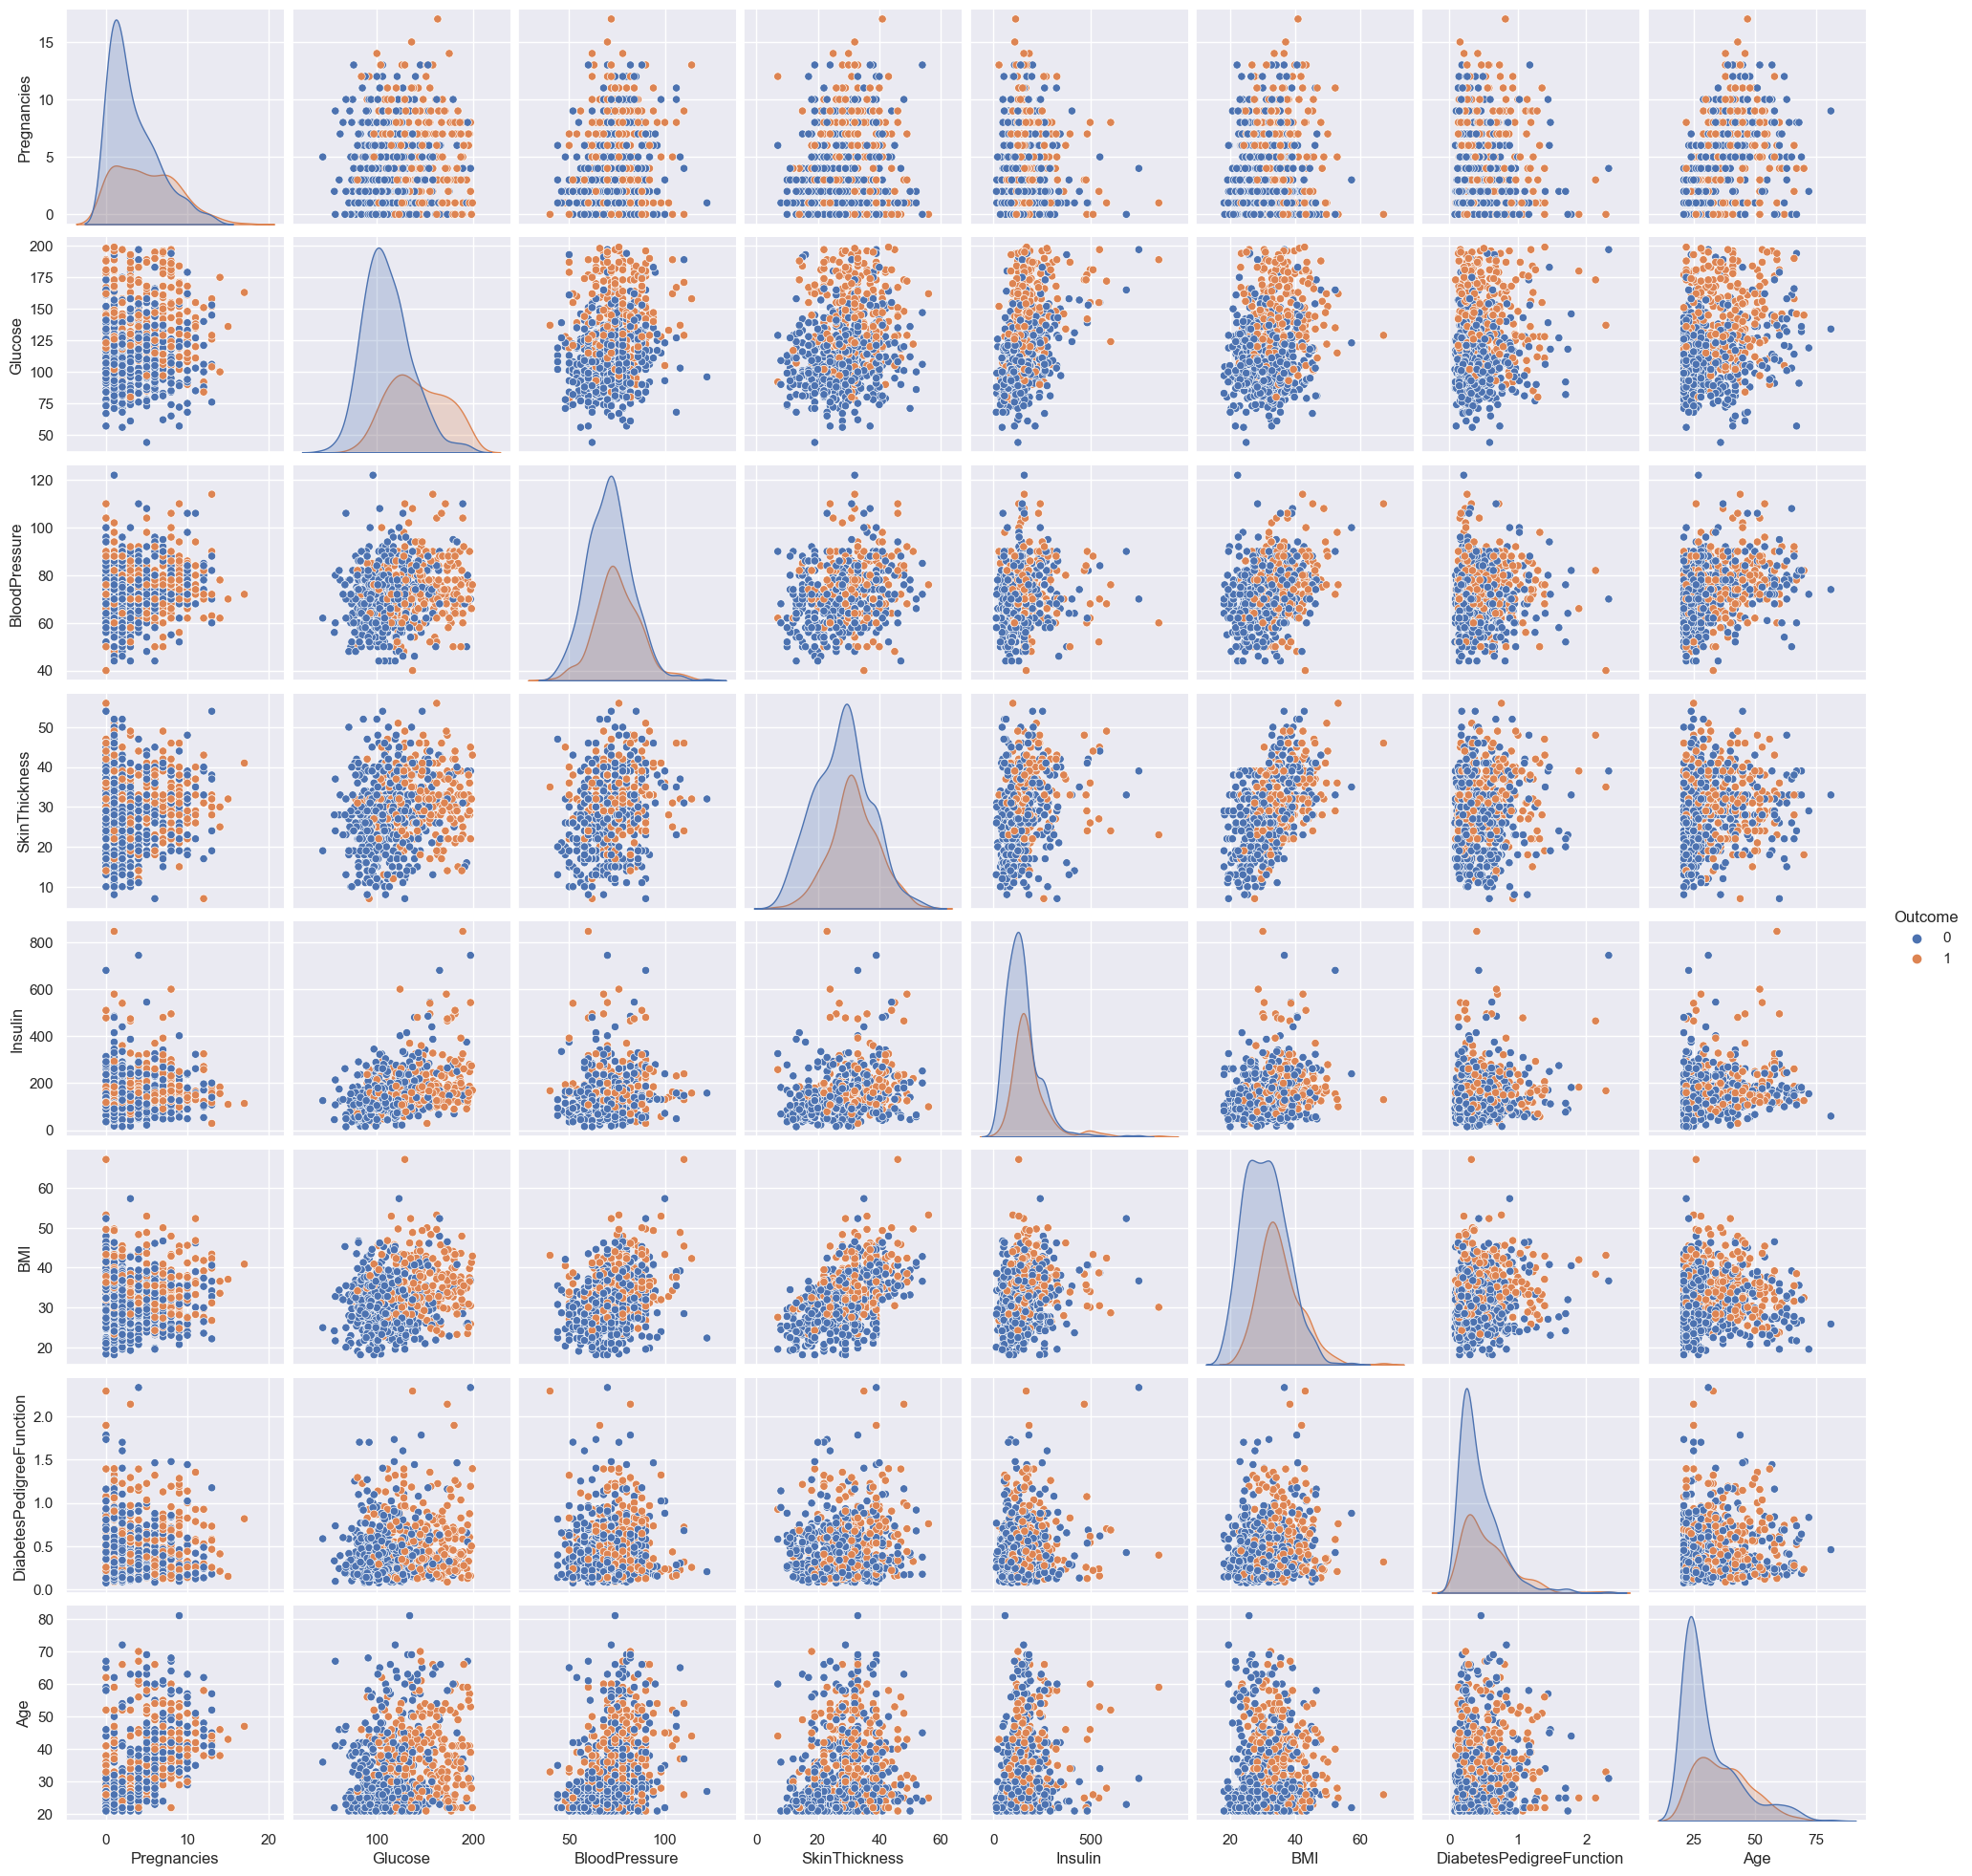

In [248]:
# Pairplot
sns.pairplot(diabetes_dataset, hue='Outcome')

* Diabetic women tend to show higher values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.

* The feature by which we can see 2 distinct groups (diabetic and non diabetic) is glucose.

# Data standardization


In [249]:
#separating the data and labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [250]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)
print(standardized_data)

[[ 0.63129363  0.86965455 -0.04777857 ...  0.18275285  0.48759819
   1.42630041]
 [-0.85238288 -1.21015032 -0.55868476 ... -0.85569355 -0.3633771
  -0.19181474]
 [ 1.22476424  2.0251017  -0.72898683 ... -1.34524685  0.62634417
  -0.10665079]
 ...
 [ 0.33455833 -0.02169039 -0.04777857 ... -0.91503334 -0.69020094
  -0.2769787 ]
 [-0.85238288  0.14337349 -1.06959095 ... -0.33647035 -0.36954358
   1.17080854]
 [-0.85238288 -0.94604811 -0.21808063 ... -0.2919655  -0.47437387
  -0.87312638]]


In [251]:
X = standardized_data
Y = diabetes_dataset['Outcome']

# Train - Test - Split


In [252]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=0)


In [253]:
print(X.shape,X_train.shape,X_test.shape)


(761, 8) (608, 8) (153, 8)


# Training the Model using Support Vector Machine (SVM) Method

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.

In [254]:
# Hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

### 2. Fetching the Best Parameters for SVM Model.

In [255]:
# Initialize the SVM model
svm_model = SVC(random_state=0)

# Create GridSearchCV for SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
svm_grid_search.fit(X_train, Y_train)

# Get the best hyperparameters for SVM
best_svm_params = svm_grid_search.best_params_
print("Best Hyperparameters for SVM:", best_svm_params)

# Train SVM with the best hyperparameters
best_svm_model = SVC(random_state=0, **best_svm_params)
best_svm_model.fit(X_train, Y_train)

Best Hyperparameters for SVM: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


SVC(C=10, gamma=0.001, random_state=0)

# Model Evaluation (Accuracy Score) for SVM

In [256]:
# Calculate accuracy on the training data for SVM
svm_train_accuracy = accuracy_score(Y_train, best_svm_model.predict(X_train))
print("SVM Training Accuracy:", svm_train_accuracy)

# Calculate accuracy on the testing data for SVM
svm_test_accuracy = accuracy_score(Y_test, best_svm_model.predict(X_test))
print("SVM Testing Accuracy:", svm_test_accuracy)


SVM Training Accuracy: 0.7680921052631579
SVM Testing Accuracy: 0.7777777777777778


# Evaluating Confusion Matrix for SVM

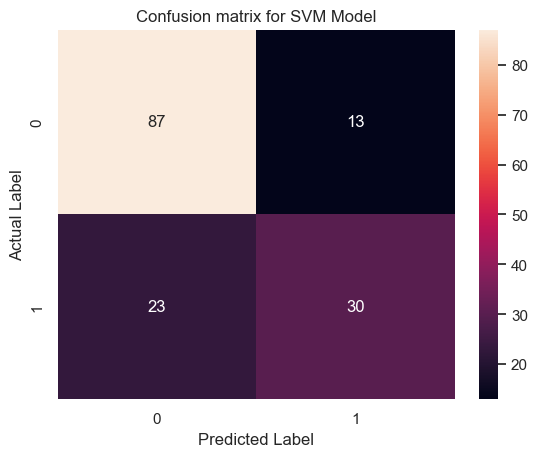

In [257]:
conf_matrix = metrics.confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for SVM Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#  Drawing AUC-ROC curve for SVM


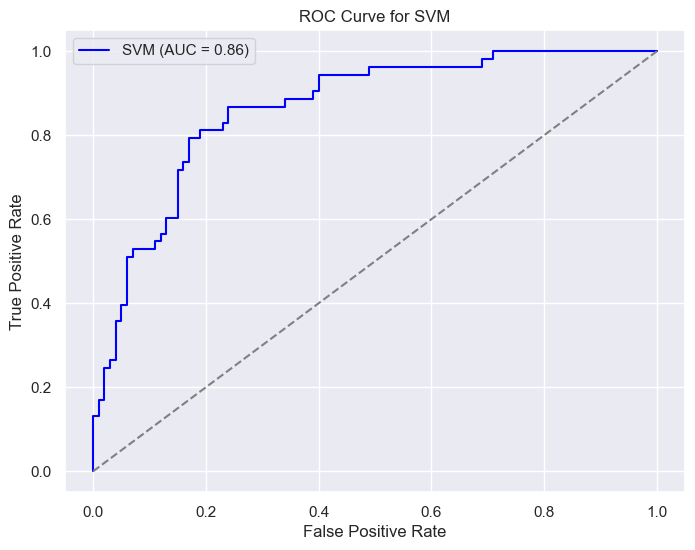

In [258]:
# Calculate ROC curve and AUC for SVM
svm_y_scores = best_svm_model.decision_function(X_test)
svm_fpr, svm_tpr, _ = roc_curve(Y_test, svm_y_scores)
svm_auc = roc_auc_score(Y_test, svm_y_scores)

# Plot ROC curve with a dotted line indicating 0.5 threshold
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})', color="blue")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend()
plt.show()

# Training the Model using Regression (Logistic Regression) Method

### 1. Performing Grid-Search with cross-validation to find the best Parameters for the Model.


In [259]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}


### 2. Fetching the Best Parameters for Regression Model.


In [260]:
# Define the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'penalty': ['l2'],  # Use 'l2' penalty for the 'lbfgs' solver
    'C': [0.01, 0.1, 1, 10],  # You can adjust the range of C values as needed
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression(solver='lbfgs', random_state=0)

# Create GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, n_jobs=-1)

# Fit the model to the training data
lr_grid_search.fit(X_train, Y_train)

# Get the best hyperparameters for Logistic Regression
best_lr_params = lr_grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_lr_params)

# Train Logistic Regression with the best hyperparameters
best_lr_model = LogisticRegression(solver='lbfgs', random_state=0, **best_lr_params)
best_lr_model.fit(X_train, Y_train)

Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}


LogisticRegression(C=1, random_state=0)

# Model Evaluation (Accuracy Score) for Regression Model

In [261]:
# Calculate accuracy on the training data for Logistic Regression
lr_train_accuracy = accuracy_score(Y_train, best_lr_model.predict(X_train))
print("Logistic Regression Training Accuracy:", lr_train_accuracy)

# Calculate accuracy on the testing data for Logistic Regression
lr_test_accuracy = accuracy_score(Y_test, best_lr_model.predict(X_test))
print("Logistic Regression Testing Accuracy:", lr_test_accuracy)

Logistic Regression Training Accuracy: 0.7730263157894737
Logistic Regression Testing Accuracy: 0.7647058823529411


# Evaluating Confusion Matrix for Regression

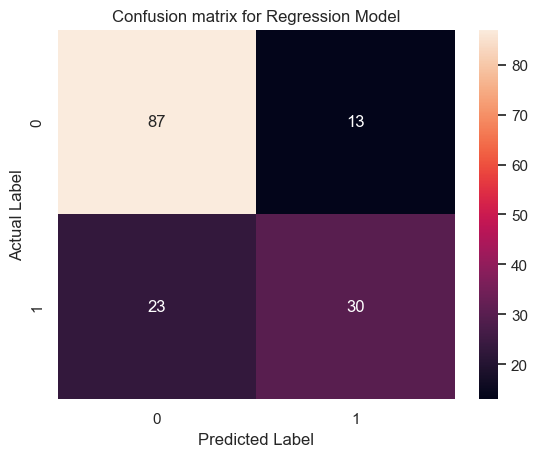

In [262]:
conf_matrix = metrics.confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(conf_matrix,annot=True)
plt.title('Confusion matrix for Regression Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Drawing AUC-ROC curve for Regression

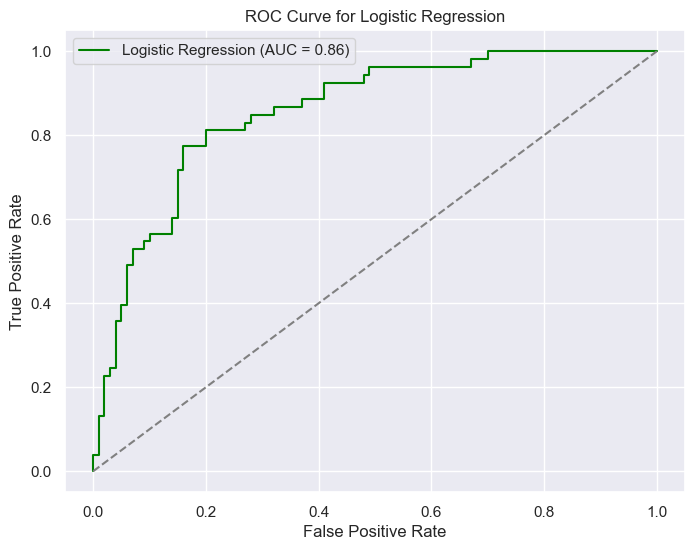

In [263]:
# Calculate ROC curve and AUC for Logistic Regression
lr_y_pred_proba = best_lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_y_pred_proba)
lr_auc = roc_auc_score(Y_test, lr_y_pred_proba)

# Plot ROC curve with a dotted line indicating 0.5 threshold
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})', color="green")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

# Conclusion:

 Since, Both the models have equal AUC score but accuracy achieved by the SVM Model is more as compared to the Regression Model, so I have decided to use the SVM Model for our predictive system.

# Making a Predictive System

# INPUT 1:

In [264]:
#input data 1
input_data = (2,197,70,45,543,30.5,0.158,53)

In [265]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [266]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [267]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.55564758  2.48728056 -0.21808063  1.79138171  4.13683756 -0.27713055
  -0.95844315  1.68179227]]


C:\Users\gulshan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [276]:
prediction = best_svm_model.predict(std_data)
print(prediction)

[0]


In [277]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')


The Patient is Not Diabetic


# INPUT 2

In [270]:
#input data 2
input_data2 = (1,189,60,23,846,30.1,0.398,59)

In [271]:
#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data2)

In [272]:
#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [273]:
#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

[[-0.85238288  0.47350124  0.1225235   2.36196662  0.47804963  0.74648089
  -0.21538139 -0.78796243]]


C:\Users\gulshan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [278]:
prediction = best_svm_model.predict(std_data)
print(prediction)

[0]


In [279]:
#output display for user
if prediction[0] == 0:
    print('The Patient is Not Diabetic')
else:
    print('The Patient is Diabetic')

The Patient is Not Diabetic
